In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bs4 import BeautifulSoup as soup # HTML parser
import requests # Page requests
import re # Regular expressions
import time # Time delays
import random # Random numbers

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://richmond.craigslist.org/search/cta?purveyor=owner#search=1~gallery~0~0'
raw = requests.get(url,headers=header) # Get page


brands = ['honda', 'dodge','toyota','ford','tesla','gmc','jeep','bmw','mitsubishi','mazda',
          'volvo','audi','volkswagen','chevy','chevrolet','acura','kia','subaru','lexus',
          'cadillac','buick','porsche','infiniti','mercedes','nissan','cadillac']


bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [39]:
data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get brand from the title string:
    words = title.split()
    hits = [word for word in words if word in brands] # Find brands in the title
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]
    # Get years from title string:
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title ) # Find year references
    if regex_search is None: # If no hits, record year as missing value
        year = np.nan
    else: # If hits, record year as first match
        year = regex_search.group(0)
    #
    data.append({'title':title,'price':price,'year':year,'link':link,'brand':brand})



In [40]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']
print(df.shape)
df.to_csv('craigslist_rva_cars.csv')
df.head()

(350, 6)


,title,price,year,link,brand,age
0,2014 ford focus,12000,2014.0,https://richmond.craigslist.org/cto/d/richmond...,ford,11.0
1,hyundai santa fe 2011,1500,2011.0,https://richmond.craigslist.org/cto/d/mechanic...,missing,14.0
2,luxury stylish benz,2900,NaN,https://richmond.craigslist.org/cto/d/halethor...,missing,NaN
3,2006 f250 bullet proofed 6.0,10000,2006.0,https://richmond.craigslist.org/cto/d/disputan...,missing,19.0
4,2011 mercedes glk 350 4 matic,7950,2011.0,https://richmond.craigslist.org/cto/d/glen-all...,mercedes,14.0


count       350.000000
mean      11278.748571
std       14557.515498
min           1.000000
25%        3500.000000
50%        6300.000000
75%       12375.000000
max      123456.000000
Name: price, dtype: float64


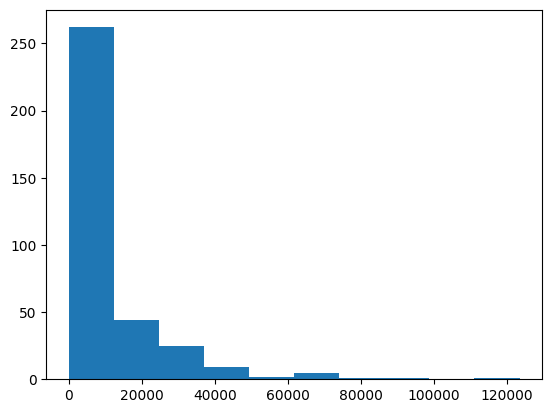

count    297.000000
mean      20.892256
std       15.481304
min        1.000000
25%       11.000000
50%       17.000000
75%       24.000000
max       96.000000
Name: age, dtype: float64


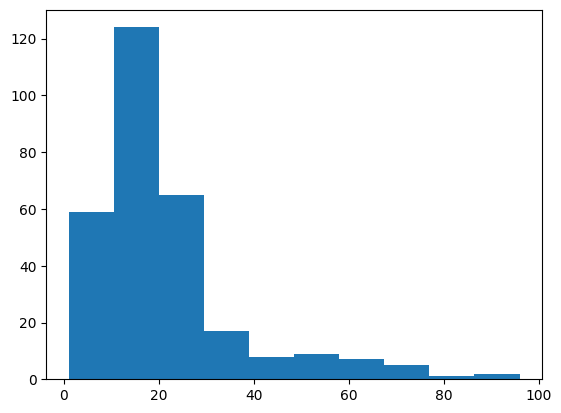

In [41]:
# EDA for price and age:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['age'].describe())
df['age'].hist(grid=False)
plt.show()

In [42]:
# Price by brand:
df.loc[:,['price','brand']].groupby('brand').describe()

price                                                          \
           count          mean           std      min       25%      50%   
brand                                                                      
acura        4.0   2975.000000   1846.844155   1150.0   1975.00   2625.0   
audi         3.0   5583.333333   2282.724980   2950.0   4875.00   6800.0   
bmw         11.0   9631.818182  12119.370296   2900.0   3550.00   6500.0   
buick        4.0  22050.000000  35347.088518   2600.0   3425.00   5300.0   
cadillac     6.0  13373.333333   9838.356909   5500.0   6687.50   8250.0   
chevrolet   15.0  23609.666667  27266.328166   2200.0   5997.50   9500.0   
chevy       10.0  11635.000000  16505.454486   1400.0   2600.00   4400.0   
dodge       15.0   9366.666667   8335.266442   1500.0   3600.00   8000.0   
ford        46.0  11423.456522  14578.579868      1.0   3500.00   7974.5   
gmc          7.0  19385.714286  11332.464953   5500.0  10250.00  20000.0   
honda       34.0   6517.911765   5290.363374      9.0   3400.00   5300.0   
infiniti     4.0  10425.000000  11564.997478   2200.0   4150.00   6000.0   
jeep        22.0  16163.909091  26426.171533   1500.0   3350.00   6850.0   
kia          4.0   7062.500000   5512.618102    850.0   3212.50   7700.0   
lexus       12.0  10362.083333   8112.259370   2800.0   4075.00   8600.0   
mazda        2.0   4475.000000   3500.178567   2000.0   3237.50   4475.0   
mercedes    13.0   5665.307692   1940.903028   2250.0   4500.00   5500.0   
missing     94.0  10966.946809  12995.979995    150.0   3000.00   5325.0   
nissan      10.0   7859.500000   4204.793858   3500.0   4648.75   7000.0   
porsche      2.0  38750.000000  44194.173824   7500.0  23125.00  38750.0   
subaru       3.0  12466.666667  11721.916794   5500.0   5700.00   5900.0   
tesla        3.0  23933.333333   6115.826464  16900.0  21900.00  26900.0   
toyota      22.0   8577.318182   7141.755089   1100.0   3849.75   5247.5   
volkswagen   2.0   8975.000000   5692.209589   4950.0   6962.50   8975.0   
volvo        2.0   7700.000000   6788.225099   2900.0   5300.00   7700.0   

                               
                75%       max  
brand                          
acura        3625.0    5500.0  
audi         6900.0    7000.0  
bmw          8300.0   45000.0  
buick       23925.0   75000.0  
cadillac    21617.5   26000.0  
chevrolet   31975.0   97500.0  
chevy        7575.0   42950.0  
dodge       12000.0   34900.0  
ford        11875.0   63000.0  
gmc         28350.0   33000.0  
honda        8425.0   29500.0  
infiniti    12275.0   27500.0  
jeep        17625.0  123456.0  
kia         11550.0   12000.0  
lexus       12962.5   26500.0  
mazda        5712.5    6950.0  
mercedes     6500.0    9900.0  
missing     13750.0   65900.0  
nissan       9425.0   17000.0  
porsche     54375.0   70000.0  
subaru      15950.0   26000.0  
tesla       27450.0   28000.0  
toyota      12375.0   26500.0  
volkswagen  10987.5   13000.0  
volvo       10100.0   12500.0

In [43]:
# Age by brand:
df.loc[:,['age','brand']].groupby('brand').describe()

age                                                      
           count       mean        std   min    25%   50%    75%   max
brand                                                                 
acura        4.0  18.250000   5.123475  13.0  14.50  18.0  21.75  24.0
audi         3.0  14.666667   1.527525  13.0  14.00  15.0  15.50  16.0
bmw          9.0  18.111111   7.785314  12.0  14.00  14.0  20.00  37.0
buick        4.0  28.750000  29.124732   9.0  13.50  17.0  32.25  72.0
cadillac     4.0  16.250000  11.086779   6.0   7.50  15.0  23.75  29.0
chevrolet   15.0  27.133333  29.011984   1.0   9.00  12.0  37.00  88.0
chevy        8.0  26.125000  21.944329   2.0  12.25  19.5  35.75  70.0
dodge       13.0  24.307692  16.595103   4.0  12.00  19.0  33.00  57.0
ford        41.0  18.219512  14.128893   2.0  11.00  13.0  23.00  69.0
gmc          6.0  13.833333   4.956477   7.0  12.00  12.5  16.75  21.0
honda       30.0  18.066667   7.148346   8.0  13.00  17.5  20.75  36.0
infiniti     4.0  14.000000   3.741657   9.0  12.75  14.5  15.75  18.0
jeep        19.0  16.000000   8.465617   4.0   9.50  17.0  21.00  35.0
kia          3.0  10.666667   4.725816   7.0   8.00   9.0  12.50  16.0
lexus       10.0  17.700000   6.667500   6.0  14.00  17.5  22.50  27.0
mazda        2.0  26.000000  15.556349  15.0  20.50  26.0  31.50  37.0
mercedes    13.0  25.692308  22.702366  10.0  14.00  18.0  23.00  96.0
missing     73.0  26.534247  17.626591   2.0  14.00  21.0  39.00  69.0
nissan       8.0  11.750000   4.334249   7.0   7.75  12.0  13.75  19.0
porsche      1.0  27.000000        NaN  27.0  27.00  27.0  27.00  27.0
subaru       3.0  10.333333   6.350853   3.0   8.50  14.0  14.00  14.0
tesla        2.0   7.000000   0.000000   7.0   7.00   7.0   7.00   7.0
toyota      18.0  17.888889   6.115447   6.0  14.50  18.5  21.75  31.0
volkswagen   2.0  12.000000   4.242641   9.0  10.50  12.0  13.50  15.0
volvo        2.0  18.500000  12.020815  10.0  14.25  18.5  22.75  27.0

In [44]:
df.loc[ df['brand']=='mercedes',:]

,title,price,year,link,brand,age
4,2011 mercedes glk 350 4 matic,7950,2011.0,https://richmond.craigslist.org/cto/d/glen-all...,mercedes,14.0
15,2002 mercedes benz ml320,6000,2002.0,https://richmond.craigslist.org/cto/d/richmond...,mercedes,23.0
28,2002 mercedes ml320 255000ml daily driver.,2250,2002.0,https://richmond.craigslist.org/cto/d/gillam-2...,mercedes,23.0
39,2013 mercedes benz,6800,2013.0,https://richmond.craigslist.org/cto/d/richmond...,mercedes,12.0
47,2007 mercedes benz c280 or 05 benz e500 4matic...,4950,2007.0,https://richmond.craigslist.org/cto/d/henrico-...,mercedes,18.0
51,2002 mercedes benz c320 - runs and drives great!!,4000,2002.0,https://richmond.craigslist.org/cto/d/glen-all...,mercedes,23.0
68,2008 mercedes benz,6500,2008.0,https://richmond.craigslist.org/cto/d/richmond...,mercedes,17.0
118,2001 mercedes slk 230,3999,2001.0,https://richmond.craigslist.org/cto/d/richmond...,mercedes,24.0
126,1982 mercedes 240 d - diesel,4500,1982.0,https://richmond.craigslist.org/cto/d/providen...,mercedes,43.0
153,2011 mercedes c300,6300,2011.0,https://richmond.craigslist.org/cto/d/henrico-...,mercedes,14.0


<Axes: xlabel='age', ylabel='price'>

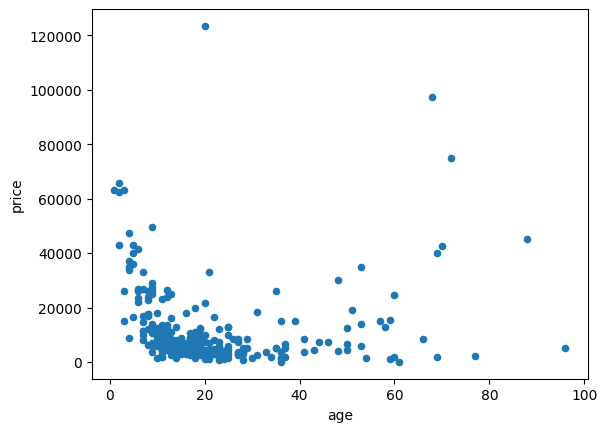

In [45]:
df.plot.scatter('age','price')

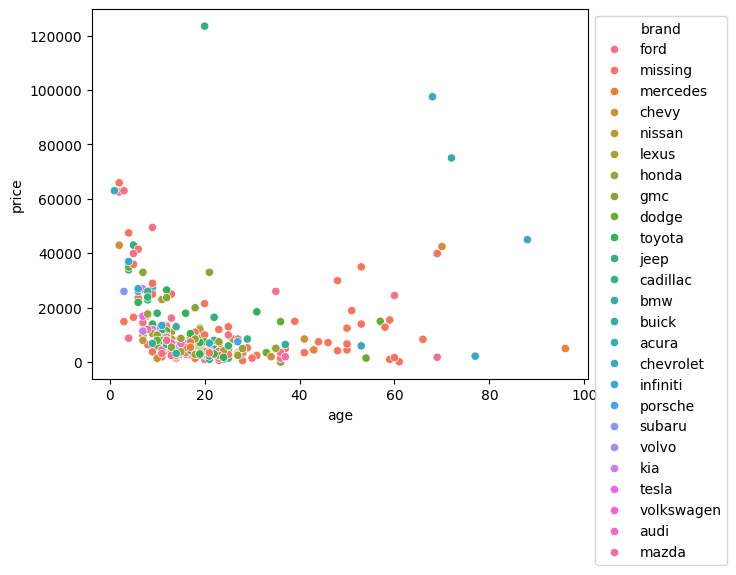

In [46]:
ax = sns.scatterplot(data=df, x='age', y='price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

           log_price   log_age
log_price   1.300438 -0.275912
log_age    -0.275912  0.481948
           log_price   log_age
log_price   1.000000 -0.382186
log_age    -0.382186  1.000000


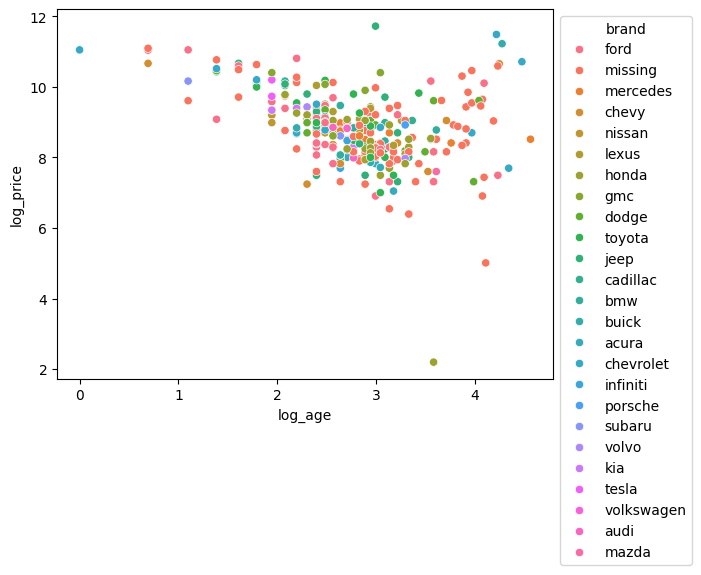

In [47]:
df['log_price'] = np.log(df['price'])
df['log_age'] = np.log(df['age'])

ax = sns.scatterplot(data=df, x='log_age', y='log_price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

print(df.loc[:,['log_price','log_age']].cov())
print(df.loc[:,['log_price','log_age']].corr())

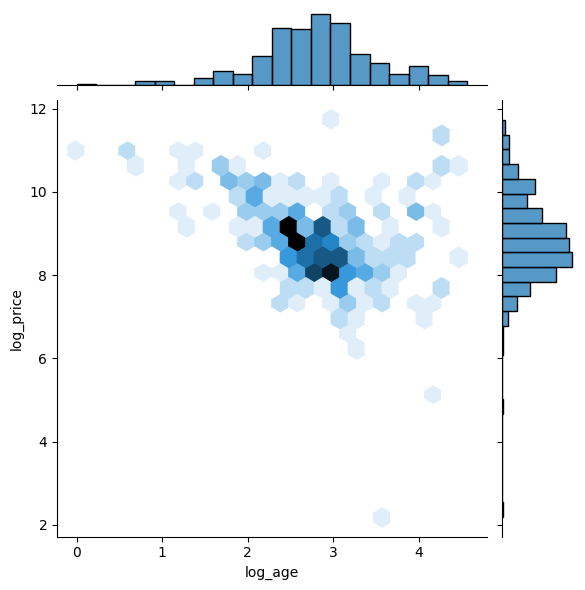

In [48]:
sns.jointplot(data=df, x='log_age', y='log_price',kind='hex')

In [49]:
df.head()

,title,price,year,link,brand,age,log_price,log_age
0,2014 ford focus,12000,2014.0,https://richmond.craigslist.org/cto/d/richmond...,ford,11.0,9.392662,2.397895
1,hyundai santa fe 2011,1500,2011.0,https://richmond.craigslist.org/cto/d/mechanic...,missing,14.0,7.313220,2.639057
2,luxury stylish benz,2900,NaN,https://richmond.craigslist.org/cto/d/halethor...,missing,NaN,7.972466,NaN
3,2006 f250 bullet proofed 6.0,10000,2006.0,https://richmond.craigslist.org/cto/d/disputan...,missing,19.0,9.210340,2.944439
4,2011 mercedes glk 350 4 matic,7950,2011.0,https://richmond.craigslist.org/cto/d/glen-all...,mercedes,14.0,8.980927,2.639057


In [ ]:
links = df['link']
data = []
for link in links: # about 3 minutes
    time.sleep(random.randint(1, 3))
    raw = requests.get(link,headers=header) # Get page
    bsObj = soup(raw.content,'html.parser') # Parse the html
    #
    try:
        year_post = bsObj.find(class_='attr important').find(class_ = 'valu year').get_text()
    except:
        year_post = np.nan
    #
    try:
        condition = bsObj.find(class_='attr condition').find(href=True).get_text()
    except:
        condition = 'missing'
    #
    try:
        cylinders = bsObj.find(class_='attr auto_cylinders').find(class_ = 'valu').get_text()
        cylinders = cylinders.replace('\n','')
    except:
        cylinders = 'missing'
    #
    try:
        drivetrain = bsObj.find(class_='attr auto_drivetrain').find(href=True).get_text()
    except:
        drivetrain = 'missing'
    #
    try:
        fuel = bsObj.find(class_='attr auto_fuel_type').find(href = True).get_text()
    except:
        fuel = 'missing'
    #
    try:
        miles = bsObj.find(class_='attr auto_miles').find(class_ = 'valu').get_text()
    except:
        miles = np.nan
    #
    try:
        color = bsObj.find(class_='attr auto_paint').find(href=True).get_text()
    except:
        color='missing'
    #
    try:
        title = bsObj.find(class_='attr auto_title_status').find(href=True).get_text()
    except:
        title='missing'
    #
    try:
        transmission = bsObj.find(class_='attr auto_transmission').find(href=True).get_text()
    except:
        transmission = 'missing'
    #
    try:
        bodytype = bsObj.find(class_='attr auto_bodytype').find(href=True).get_text()
    except:
        bodytype = 'missing'
    text = bsObj.find(id='postingbody').get_text()
    text = text.replace('\n','')
    text = text.replace('QR Code Link to This Post','')
    record = {'title':title,
              'year_post':year_post,
              'condition':condition,
              'cylinders':cylinders,
              'drivetrain':drivetrain,
              'fuel':fuel,
              'miles':miles,
              'color':color,
              'title':'title',
              'transmission':transmission,
              'bodytype':bodytype,
              'text':text,}
    data.append(record)

In [ ]:
new_df = pd.DataFrame.from_dict(data)
new_df.head()

In [ ]:
new_df.shape

(92, 11)

In [ ]:
df = pd.concat([df,new_df],axis=1) # combine data frames
df.head()

,title,price,year,link,brand,age,log_price,log_age,title,year_post,condition,cylinders,drivetrain,fuel,miles,color,transmission,bodytype,text
0,2005 hyundai elantra,1200,2005.0,https://charlottesville.craigslist.org/cto/d/a...,missing,20.0,7.090077,2.995732,title,2005,fair,4 cylinders,fwd,gas,"232,450",silver,manual,sedan,‘05 Elantra runs good but did not pass inspect...
1,2007 f250 king ranch,17500,2007.0,https://charlottesville.craigslist.org/cto/d/w...,missing,18.0,9.769956,2.890372,title,2007,good,8 cylinders,4wd,diesel,"148,086",missing,automatic,pickup,"6.0 diesel, bulletproofed, just replaced trans..."
2,1997 dodge 2500 4x4 cummins,9500,1997.0,https://charlottesville.craigslist.org/cto/d/l...,dodge,28.0,9.159047,3.332205,title,1997,fair,6 cylinders,4wd,diesel,"179,000",red,automatic,truck,1997 Dodge 4x4 Cummins. Adult owned and driven...
3,1999 honda civic 4 cyl manual transmission,1000,1999.0,https://charlottesville.craigslist.org/cto/d/c...,honda,26.0,6.907755,3.258097,title,1999,salvage,4 cylinders,rwd,gas,"195,338",silver,manual,sedan,"Vehicle does start and run, it has a manual tr..."
4,"1998 gmc sierra 1500 sl truck auto rwd <103,00...",6250,1998.0,https://charlottesville.craigslist.org/cto/d/l...,gmc,27.0,8.740337,3.295837,title,1998,good,8 cylinders,rwd,gas,"102,483",missing,automatic,truck,"1998 GMC Sierra 1500 SL Truck, Auto 2WD/RWD, V..."


In [ ]:
df.dtypes

title            object
price             int64
year            float64
link             object
brand            object
age             float64
log_price       float64
log_age         float64
title            object
year_post        object
condition        object
cylinders        object
drivetrain       object
fuel             object
miles            object
color            object
transmission     object
bodytype         object
text             object
dtype: object